# Implementing Naive Bayes for Sentiment Analysis

In [1]:
import pandas as pd
%config Completer.use_jedi = False

Dataset link - [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#)

In [2]:
dataset = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt',sep='\t', names=['Review','Positive'])

In [3]:
dataset

,Review,Positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


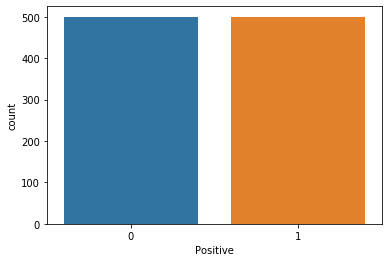

In [4]:
import seaborn as sns
%matplotlib inline

sns.countplot(dataset['Positive'])

In [5]:
#separating features and target
x = dataset['Review']
y = dataset['Positive']

In [6]:
#Importing necessary libs
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [7]:
#Lemmetizer instance
myLemmetizer = WordNetLemmatizer()

In [8]:
#function to clean data - remove symbols, change to lowercase, lemmetize words
def clean_data(x):
    clean = re.sub('[^a-zA-Z]',' ', x)
    clean = clean.lower()
    clean = clean.split()
    clean = [myLemmetizer.lemmatize(i) for i in clean if i not in set(stopwords.words('english'))]
    return ' '.join(clean)

In [9]:
#Testing our cleaning function
clean_data('hI$ There-GOoD day')

'hi good day'

In [10]:
x[:5]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: Review, dtype: object

In [11]:
#Applying the cleaning function
x = x.apply(clean_data)
x

0                         way plug u unless go converter
1                              good case excellent value
2                                          great jawbone
3      tied charger conversation lasting minute major...
4                                              mic great
                             ...                        
995             screen get smudged easily touch ear face
996                           piece junk lose call phone
997                                   item match picture
998                 thing disappoint infra red port irda
999                        answer call unit never worked
Name: Review, Length: 1000, dtype: object

In [12]:
#Creating a bag of word model by encoding features
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bagOfWords = pd.DataFrame(cv.fit_transform(x).toarray())
bagOfWords.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
'''no. of rows are same in bag of word model which is a bit representation 
of sentences with cols = all unique words in training data'''
dataset.shape, bagOfWords.shape

((1000, 2), (1000, 1553))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bagOfWords, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
prediction = clf.predict(X_test)

In [18]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
#checking Accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       121
           1       0.77      0.86      0.81       129

    accuracy                           0.80       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.80      0.79       250



In [20]:
#Method 2 for accuracy check
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.7938689217758985

In [21]:
import jovian
jovian.commit('simple annotations added')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "namansnghl/naive-bayes-sentiment-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/namansnghl/naive-bayes-sentiment-analysis


'https://jovian.ml/namansnghl/naive-bayes-sentiment-analysis'